# Introduction


The app can be located her: 
* https://splunkbase.splunk.com/app/4305/
* https://github.com/olafhartong/ThreatHunting

It is made by Olaf Hartong:  https://twitter.com/olafhartong

In this notebook I'm googing to test the threathunting app on the botsv2 dataset


## Overview


The security content is built into 125 saved searches:

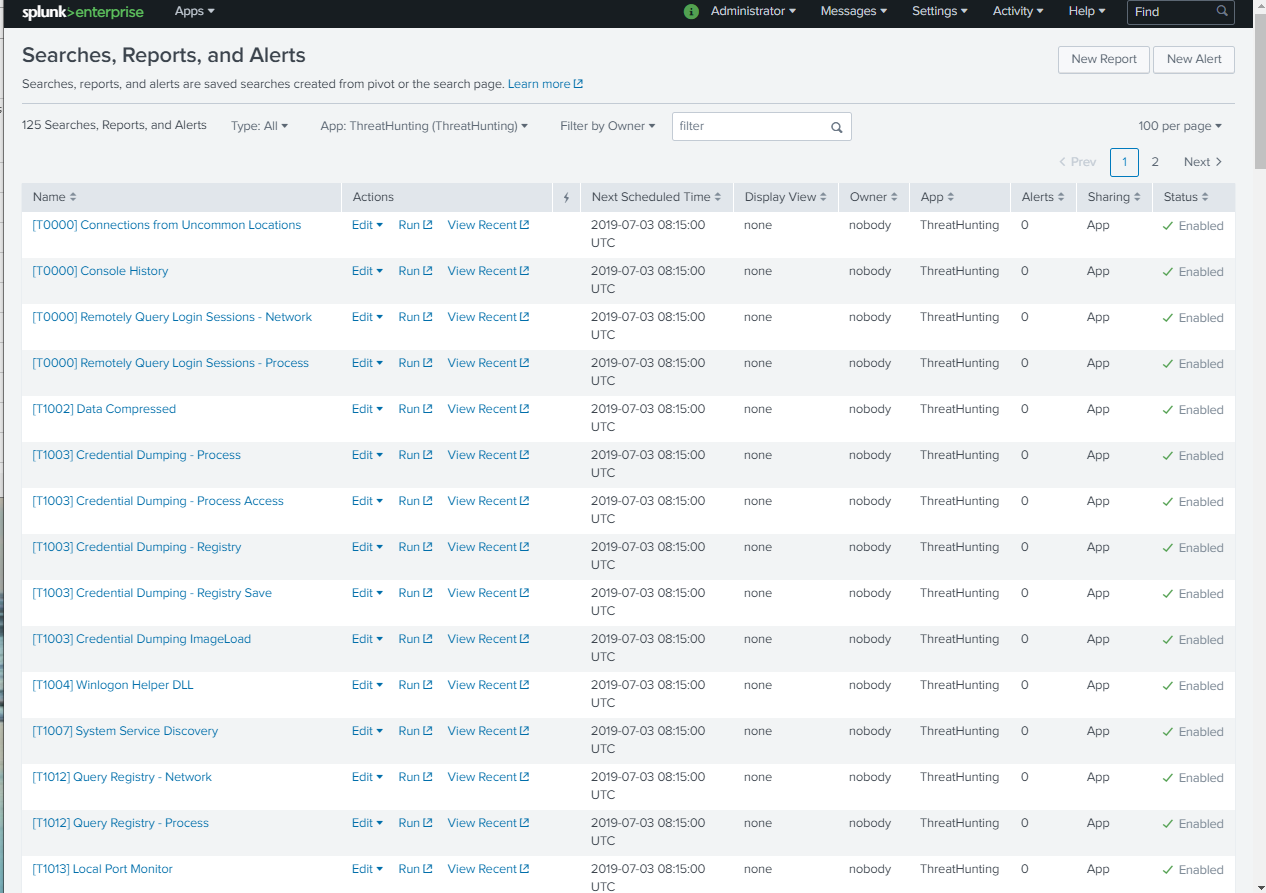


Each search has about the same structure as the example below

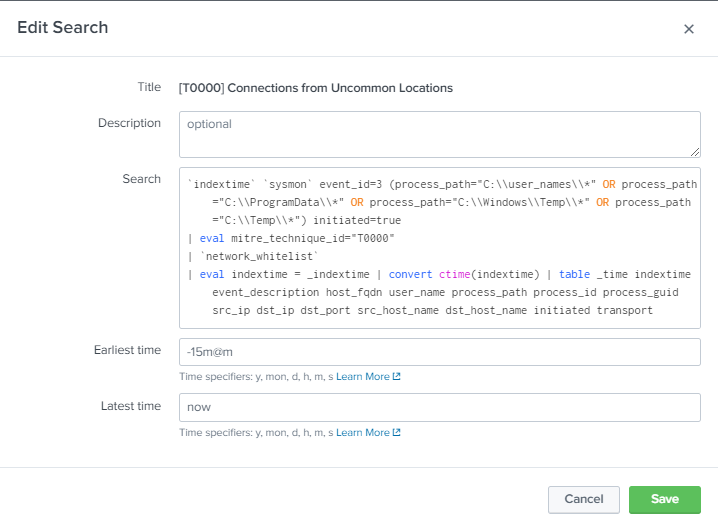

## Setup Index

As part of the setup I had to create a threathunting index
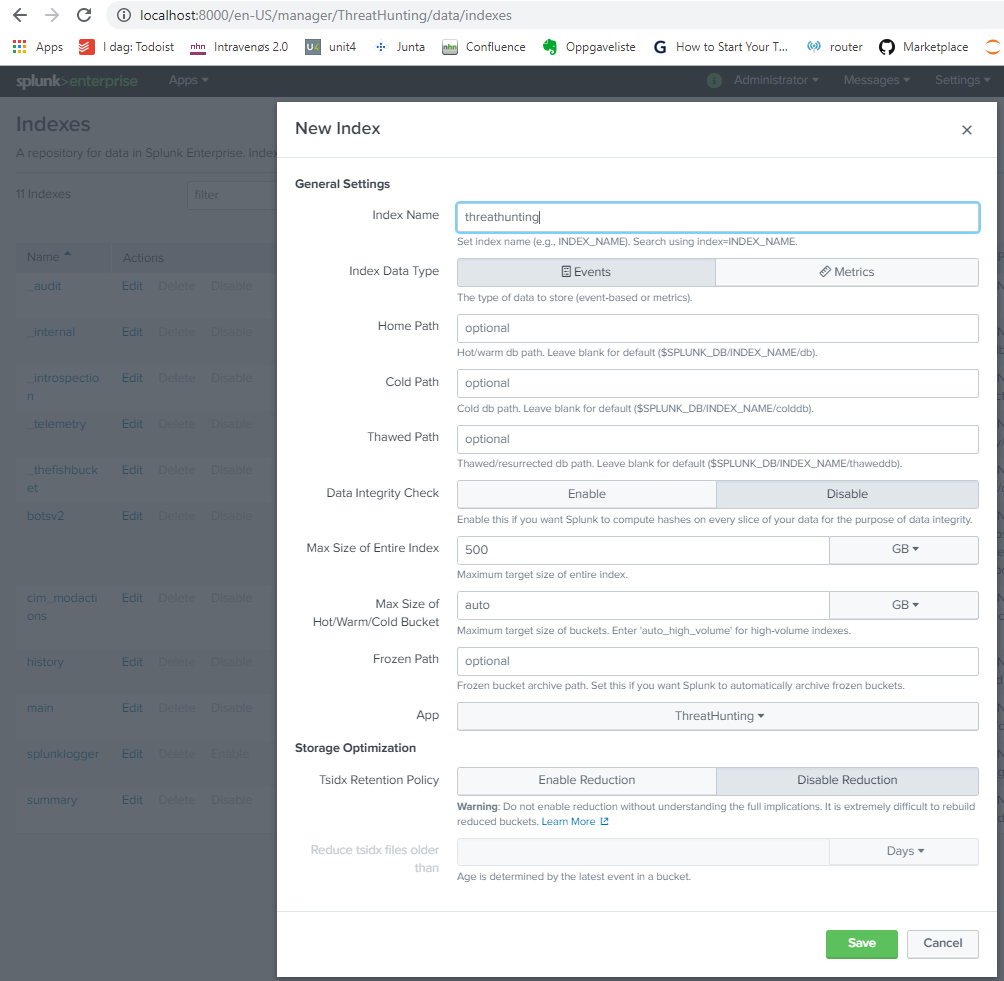


## Macro config


* I had to set the indextime  macro to all time to be able to work on the recorded botsv2 dataset
* I had to change the index to botsv2 for the rest of the macros

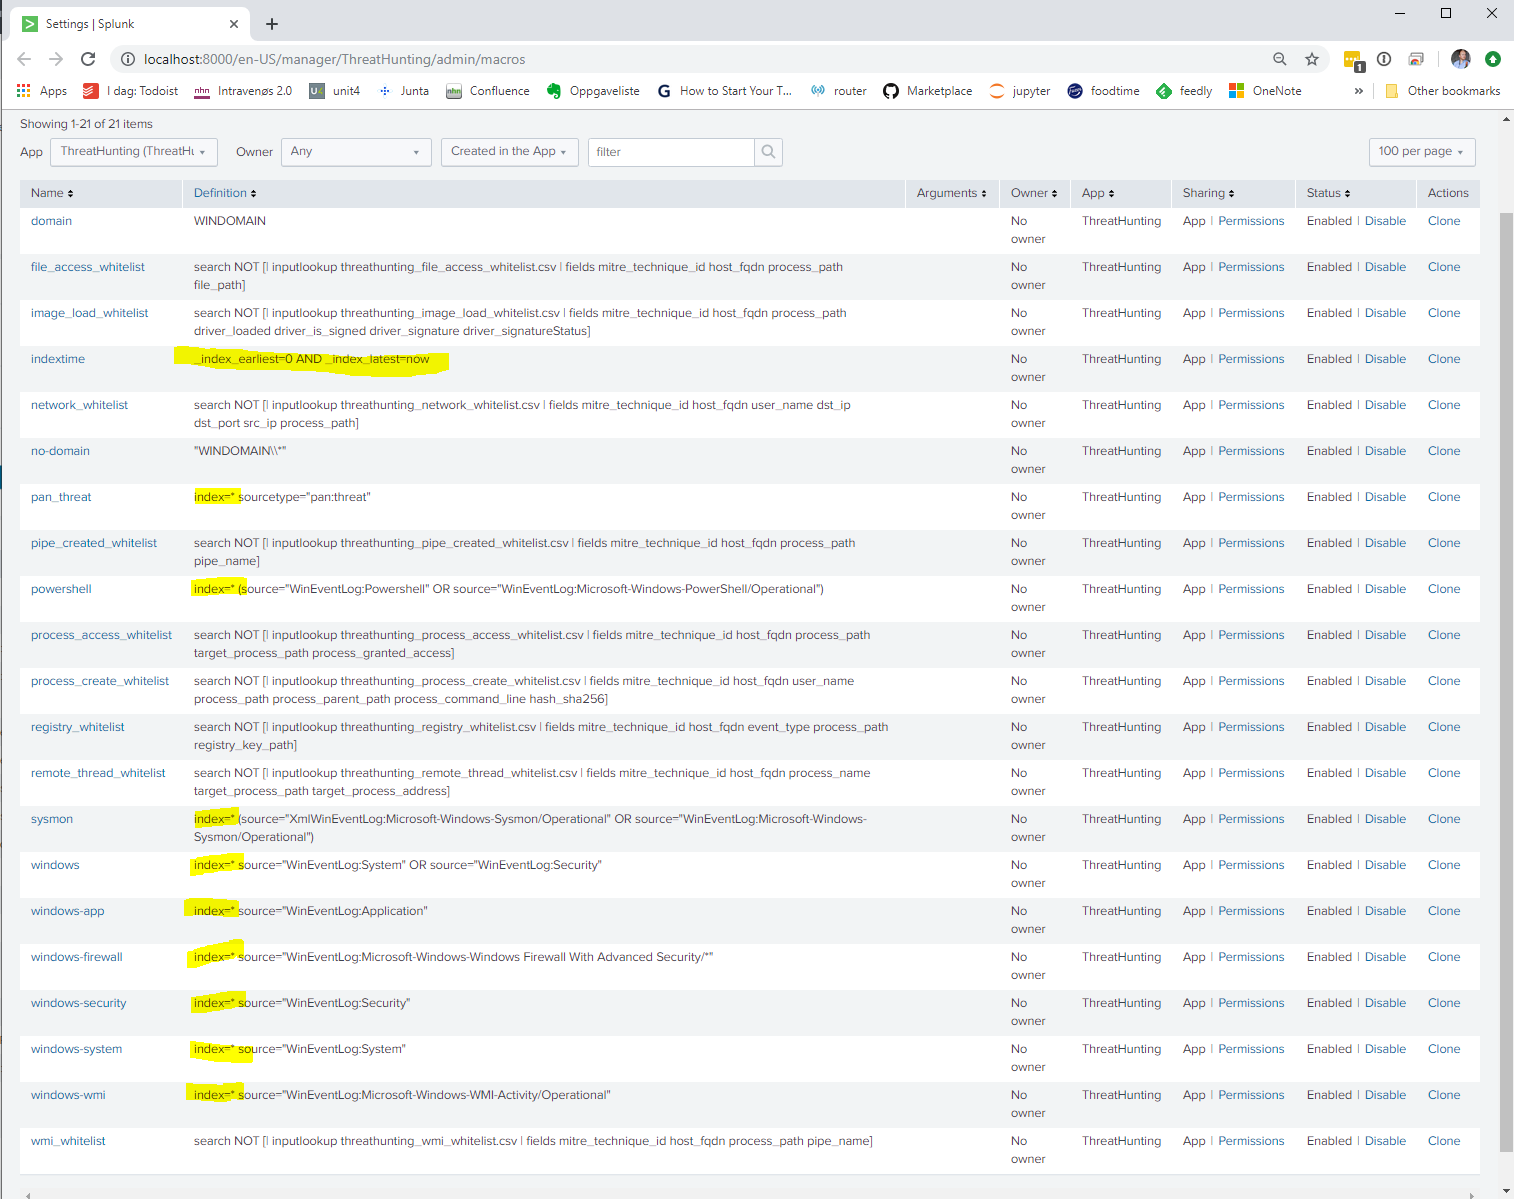


## Running the saved searches in batch

In theory I could have used the fill_summary_index.py script.

```./splunk cmd python fill_summary_index.py -app ThreatHunting -name "*"  -et 1503090074 -lt 1528136337m```

This would have spawned 3.47 million search jobs and taken forever.
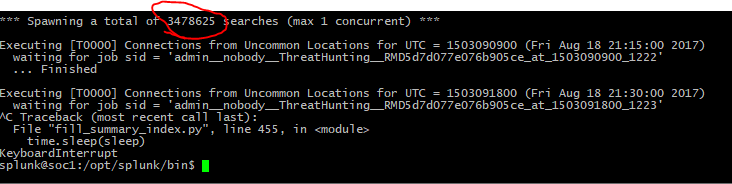

The problem with fill_summary_index.py is that each of the 125 saved searches is spawn once for every 15min period. To avoid this problem I had to develop the script below that only executes a search jobs once for the whole time period.

In [5]:
from splunklib.client import connect
from time import sleep

In [6]:
service = connect(username="admin",password="superadmin",app="ThreatHunting")
saved_searches=[s for s in service.saved_searches if s.access["app"]=="ThreatHunting"]
len(saved_searches)

125

In [7]:
for s in saved_searches:
    print (s.name)

[T0000] Connections from Uncommon Locations
[T0000] Console History
[T0000] Remotely Query Login Sessions - Network
[T0000] Remotely Query Login Sessions - Process
[T1002] Data Compressed
[T1003] Credential Dumping - Process
[T1003] Credential Dumping - Process Access
[T1003] Credential Dumping - Registry
[T1003] Credential Dumping - Registry Save
[T1003] Credential Dumping ImageLoad
[T1004] Winlogon Helper DLL
[T1007] System Service Discovery
[T1012] Query Registry - Network
[T1012] Query Registry - Process
[T1013] Local Port Monitor
[T1015] Accessibility Features
[T1015] Accessibility Features - Registry
[T1016] System Network Configuration Discovery
[T1018] Remote System Discovery - Network
[T1018] Remote System Discovery - Process
[T1027] Obfuscated Files or Information
[T1028] Windows Remote Management
[T1031] Modify Existing Service
[T1033] System Owner/User Discovery
[T1037] Logon Scripts
[T1040] Network Sniffing
[T1042] Change Default File Association
[T1043] Commonly Used Port

In [8]:
#Examplesaved search info
saved_searches[0].access

{'app': 'ThreatHunting',
 'can_change_perms': '1',
 'can_list': '1',
 'can_share_app': '1',
 'can_share_global': '1',
 'can_share_user': '0',
 'can_write': '1',
 'modifiable': '1',
 'owner': 'nobody',
 'perms': {'read': ['*'], 'write': ['*']},
 'removable': '0',
 'sharing': 'app'}

In [9]:
#Example saved search info
saved_searches[0].content

{'action.email': '0',
 'action.email.sendresults': None,
 'action.email.to': None,
 'action.email.useNSSubject': '1',
 'action.populate_lookup': '0',
 'action.rss': '0',
 'action.script': '0',
 'action.summary_index': '1',
 'action.summary_index._name': 'threathunting',
 'action.summary_index.mitre_category': 'Lateral_Movement,Execution',
 'action.summary_index.mitre_technique': 'Connections from Uncommon Locations',
 'action.summary_index.mitre_technique_id': 'T0000',
 'actions': 'summary_index',
 'alert.digest_mode': '1',
 'alert.expires': '24h',
 'alert.managedBy': None,
 'alert.severity': '3',
 'alert.suppress': None,
 'alert.suppress.fields': None,
 'alert.suppress.period': None,
 'alert.track': '0',
 'alert_comparator': None,
 'alert_condition': None,
 'alert_threshold': None,
 'alert_type': 'always',
 'allow_skew': '0',
 'auto_summarize': '0',
 'auto_summarize.command': '| summarize override=partial timespan=$auto_summarize.timespan$ max_summary_size=$auto_summarize.max_summary_

In [10]:
 #Run all savedsearches
kwargs = {                                                
  'dispatch.earliest_time' : '0',
  'dispatch.latest_time' : '1561983588 '
}

r=[]
for s in saved_searches:
    print (s.name)
    job=s.dispatch(**kwargs)
    while True:
        sleep(2)
        job.refresh()
        stats = {"isDone": job["isDone"],
             "doneProgress": float(job["doneProgress"])*100,
              "scanCount": int(job["scanCount"]),
              "eventCount": int(job["eventCount"]),
              "resultCount": int(job["resultCount"])}
        
        
        status = ("\r%(doneProgress)03.1f%%   %(scanCount)d scanned %(eventCount)d matched   %(resultCount)d results") % stats
        print (status)    
        print (job["doneProgress"])
        if float(job["doneProgress"])==1:
            print ("True")
            r.append(stats)
            break

[T0000] Connections from Uncommon Locations
35.3%   4904 scanned 4167 matched   0 results
0.35294
100.0%   5297 scanned 4576 matched   4576 results
1.00000
True
[T0000] Console History
100.0%   1 scanned 0 matched   0 results
1.00000
True
[T0000] Remotely Query Login Sessions - Network
17.6%   4058 scanned 0 matched   0 results
0.17647
35.3%   28474 scanned 4576 matched   0 results
0.35294
100.0%   99595 scanned 4576 matched   4576 results
1.00000
True
[T0000] Remotely Query Login Sessions - Process
17.6%   12501 scanned 0 matched   0 results
0.17632
23.5%   53593 scanned 0 matched   0 results
0.23529
35.3%   83236 scanned 0 matched   0 results
0.35294
36.4%   120736 scanned 0 matched   0 results
0.36350
37.4%   158236 scanned 0 matched   0 results
0.37406
38.5%   195736 scanned 0 matched   0 results
0.38463
39.5%   233236 scanned 0 matched   0 results
0.39519
40.2%   258236 scanned 0 matched   0 results
0.40223
100.0%   318523 scanned 0 matched   0 results
1.00000
True
[T1002] Data Co

11.8%   1 scanned 0 matched   0 results
0.11765
21.2%   37461 scanned 0 matched   0 results
0.21234
29.4%   65104 scanned 0 matched   0 results
0.29412
35.6%   95437 scanned 0 matched   0 results
0.35646
36.7%   132937 scanned 0 matched   0 results
0.36703
37.8%   170437 scanned 0 matched   0 results
0.37759
38.8%   207937 scanned 0 matched   0 results
0.38816
39.9%   245437 scanned 0 matched   0 results
0.39872
40.9%   282937 scanned 0 matched   0 results
0.40929
100.0%   317552 scanned 0 matched   0 results
1.00000
True
[T1053] Scheduled Task - FileAccess
35.3%   113 scanned 1 matched   0 results
0.35294
100.0%   438 scanned 1 matched   1 results
1.00000
True
[T1053] Scheduled Task - Process
17.6%   12461 scanned 990 matched   0 results
0.17647
21.2%   37461 scanned 11459 matched   0 results
0.21234
33.5%   77604 scanned 20749 matched   0 results
0.33535
35.6%   95437 scanned 26297 matched   0 results
0.35646
36.7%   132937 scanned 39657 matched   0 results
0.36703
37.8%   170437 sca

17.6%   12501 scanned 12 matched   0 results
0.17632
23.5%   53593 scanned 33 matched   0 results
0.23529
35.3%   83236 scanned 33 matched   0 results
0.35294
36.4%   120736 scanned 59 matched   0 results
0.36350
37.4%   158236 scanned 59 matched   0 results
0.37406
38.5%   195736 scanned 59 matched   0 results
0.38463
39.5%   233236 scanned 113 matched   0 results
0.39519
40.9%   283236 scanned 113 matched   0 results
0.40927
100.0%   318523 scanned 135 matched   135 results
1.00000
True
[T1086] PowerShell
17.6%   12501 scanned 4 matched   0 results
0.17632
23.5%   53593 scanned 102 matched   0 results
0.23529
35.3%   83236 scanned 178 matched   0 results
0.35294
36.4%   120736 scanned 255 matched   0 results
0.36350
37.4%   158236 scanned 324 matched   0 results
0.37406
38.5%   195736 scanned 405 matched   0 results
0.38463
39.5%   233236 scanned 485 matched   0 results
0.39519
40.6%   270736 scanned 566 matched   0 results
0.40575
100.0%   318523 scanned 659 matched   0 results
1.00

37.1%   145736 scanned 0 matched   0 results
0.37054
38.1%   183236 scanned 0 matched   0 results
0.38110
39.2%   220736 scanned 0 matched   0 results
0.39167
40.2%   258236 scanned 0 matched   0 results
0.40223
64.7%   301959 scanned 0 matched   0 results
0.64706
100.0%   318523 scanned 0 matched   0 results
1.00000
True
[T1126] Network Share Connection Removal
100.0%   28 scanned 0 matched   0 results
1.00000
True
[T1127] Trusted Developer Utilities
17.6%   12501 scanned 0 matched   0 results
0.17632
23.5%   53593 scanned 0 matched   0 results
0.23529
35.3%   83236 scanned 0 matched   0 results
0.35294
36.4%   120736 scanned 0 matched   0 results
0.36350
37.4%   158236 scanned 0 matched   0 results
0.37406
38.5%   195736 scanned 0 matched   0 results
0.38463
39.5%   233236 scanned 0 matched   0 results
0.39519
40.9%   283236 scanned 0 matched   0 results
0.40927
100.0%   318523 scanned 0 matched   0 results
1.00000
True
[T1128] Netsh Helper DLL - Process
11.8%   1 scanned 0 matched  

17.6%   12501 scanned 0 matched   0 results
0.17632
23.5%   53593 scanned 0 matched   0 results
0.23529
35.3%   83236 scanned 0 matched   0 results
0.35294
36.4%   120736 scanned 0 matched   0 results
0.36350
37.4%   158236 scanned 0 matched   0 results
0.37406
38.5%   195736 scanned 0 matched   0 results
0.38463
39.5%   233236 scanned 0 matched   0 results
0.39519
40.6%   270736 scanned 0 matched   0 results
0.40575
94.1%   314375 scanned 0 matched   0 results
0.94118
100.0%   318523 scanned 0 matched   0 results
1.00000
True
[T1208] Kerberoasting
100.0%   0 scanned 0 matched   0 results
1.00000
True
[T1209] Time Providers
100.0%   0 scanned 0 matched   0 results
1.00000
True
[T1214] Credentials in Registry
100.0%   16 scanned 0 matched   0 results
1.00000
True
[T1216] Signed Script Proxy Execution
11.8%   7918 scanned 0 matched   0 results
0.11782
29.4%   43395 scanned 0 matched   0 results
0.29412
35.8%   67625 scanned 0 matched   0 results
0.35844
38.0%   117625 scanned 0 matched  

## Results
There seems to be a very high number of alerts given the small dataset. Something is probably wrong
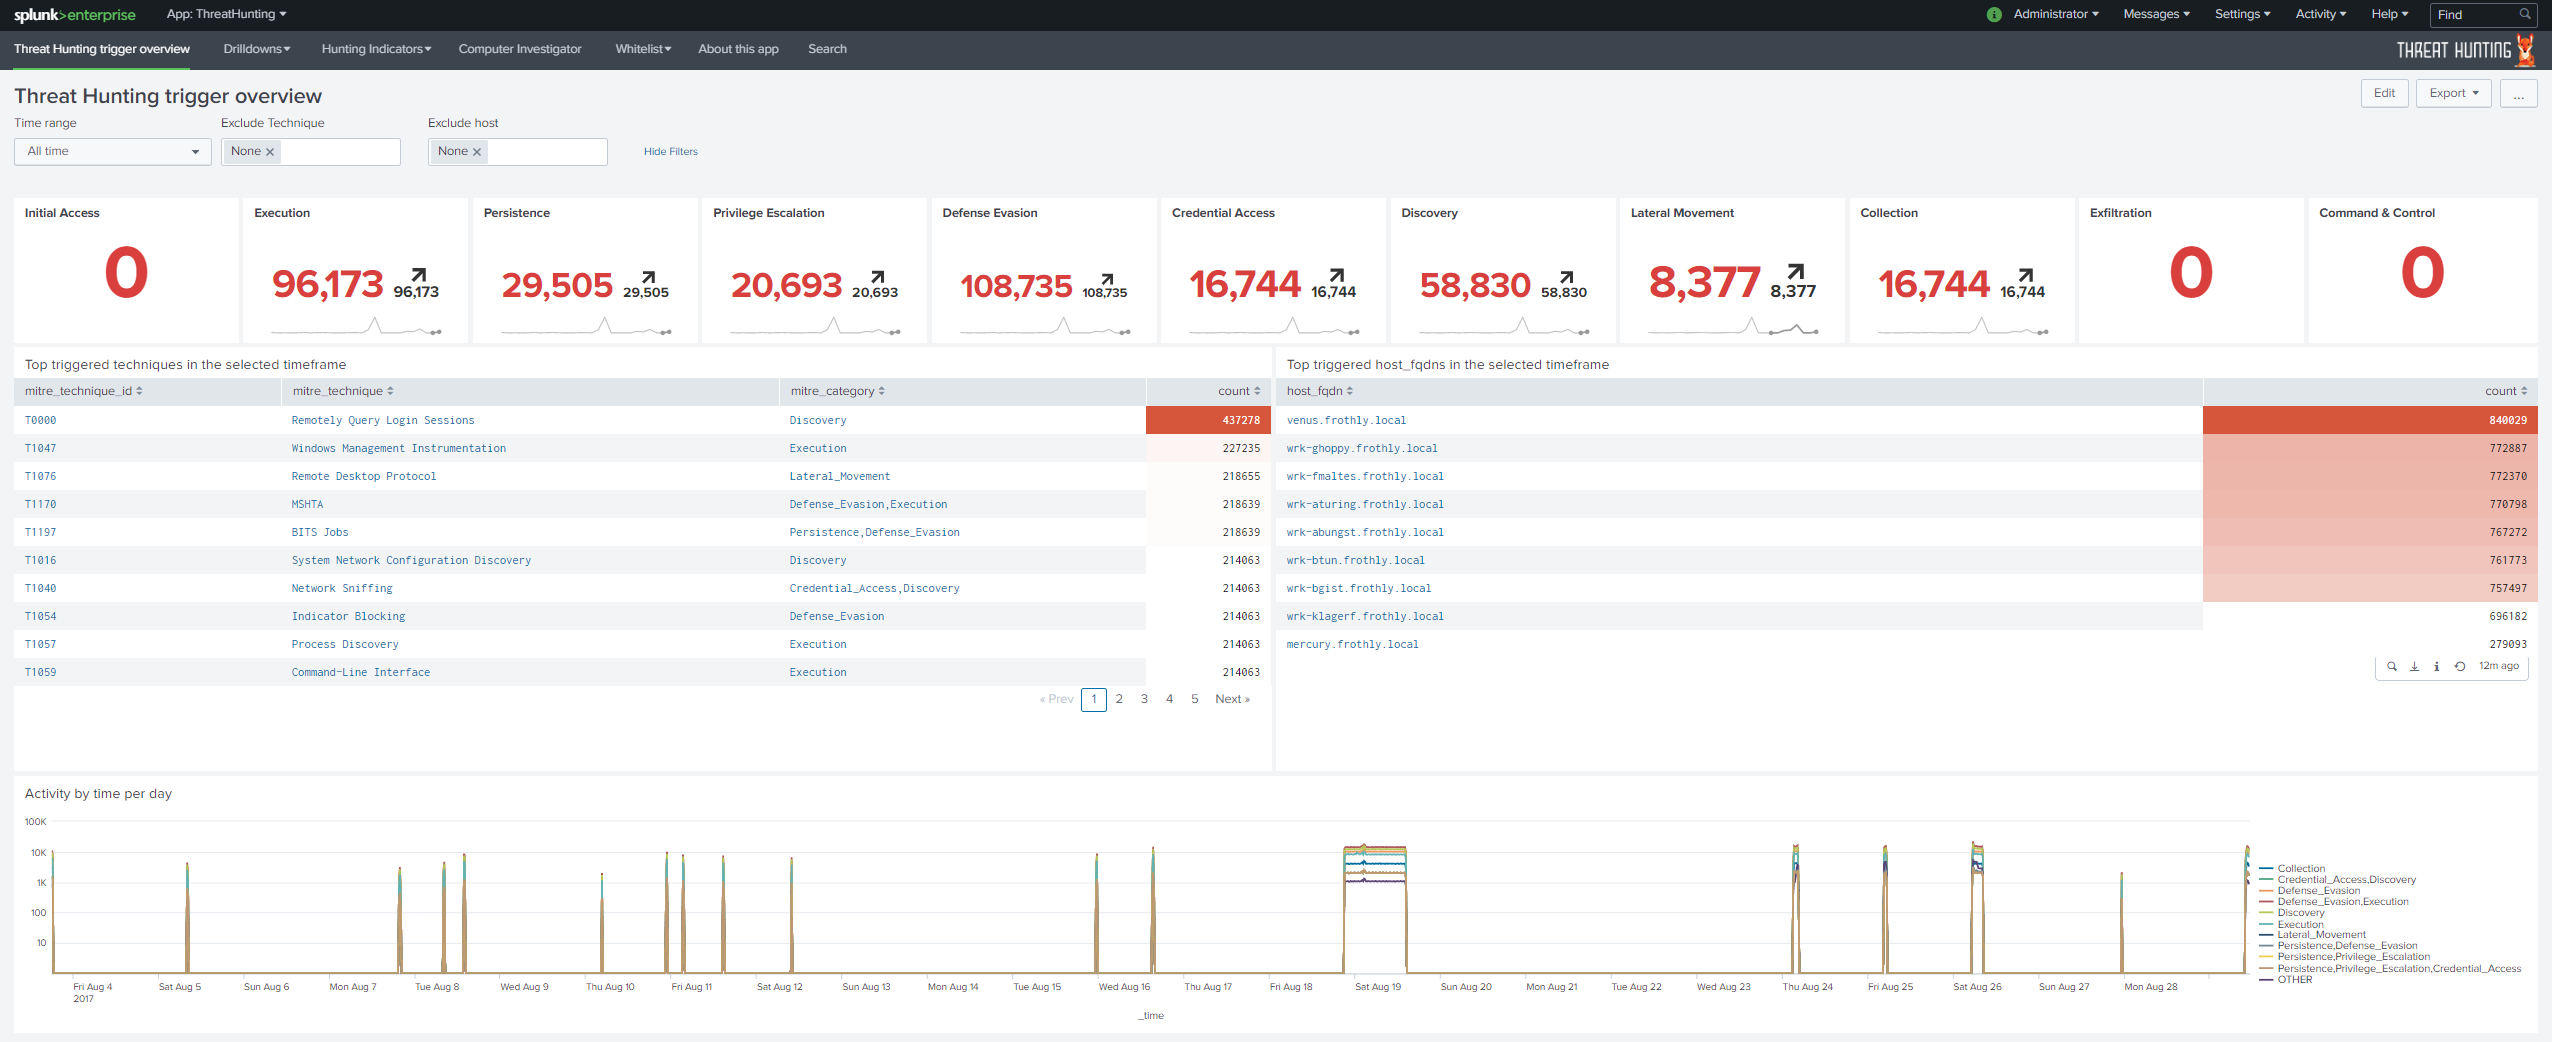

## Filtering
To make filtering work I had to remove the sha256 column from the lookuptable. The botsv2 dataset did not have sha256 hashes.

I added splunk and symatec to filter

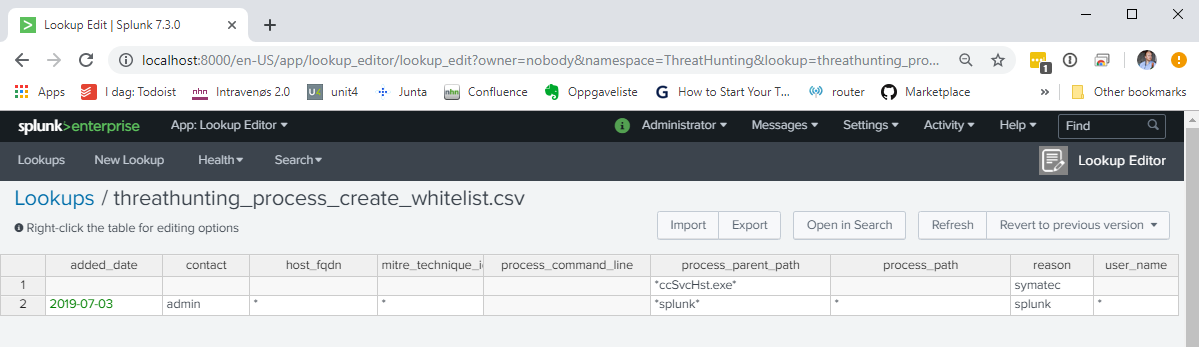



## Strange bugs

Trying to figure out why I got that many alarms.

The search below seems to match on ALL event_id=4668. Very strange


```
`indextime` ((`sysmon` event_id=1) OR (`windows-security` event_id=4688)) (process_name="qwinsta.exe")
| eval mitre_technique_id="T0000" 
| eval hash_sha256= lower(hash_sha256)
| `process_create_whitelist`
| eval indextime = _indextime | convert ctime(indextime) | table _time indextime event_description hash_sha256 host_fqdn user_name process_path process_guid process_parent_path process_id process_parent_id process_command_line process_parent_command_line process_parent_guid```

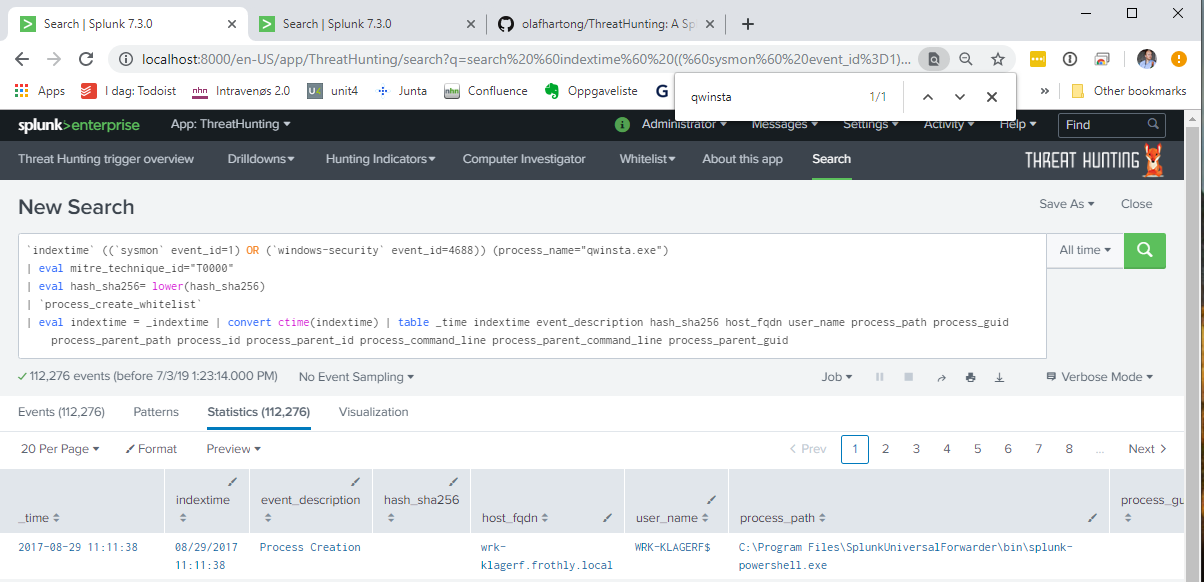

A small change and there is no matches
```
`indextime` ((`sysmon` event_id=1) OR (`windows-security` event_id=4688)) 
| search (process_name="qwinsta.exe")
| eval mitre_technique_id="T0000" 
| eval hash_sha256= lower(hash_sha256)
| `process_create_whitelist`
| eval indextime = _indextime | convert ctime(indextime) | table _time indextime event_description hash_sha256 host_fqdn user_name process_path process_guid process_parent_path process_id process_parent_id process_command_line process_parent_command_line process_parent_guid```

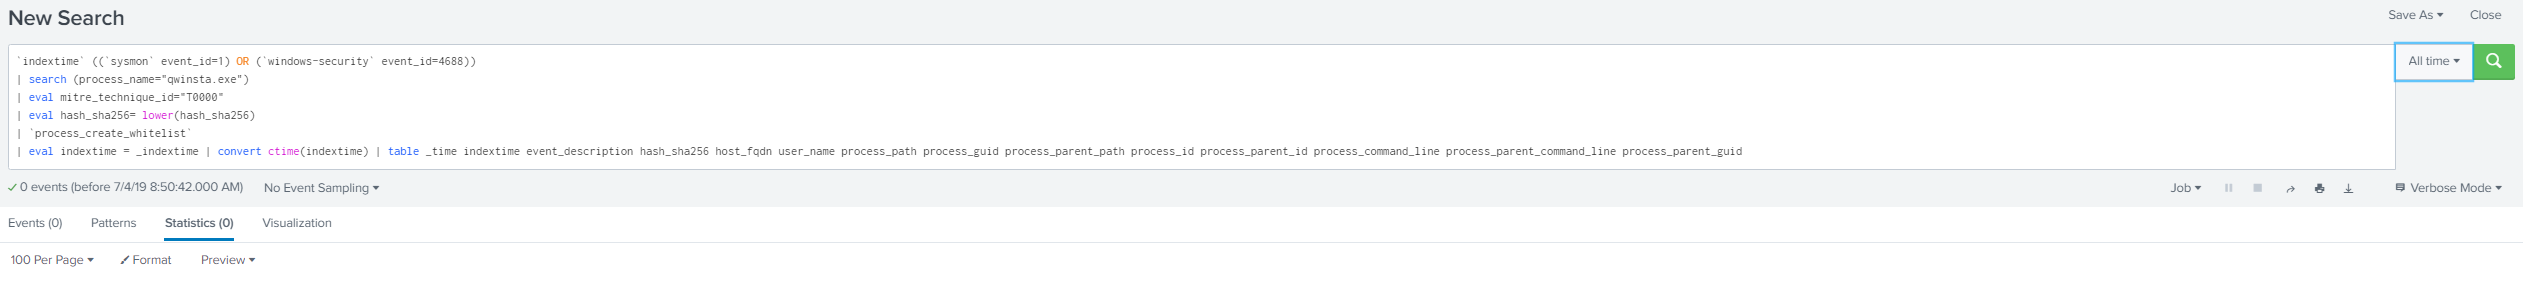

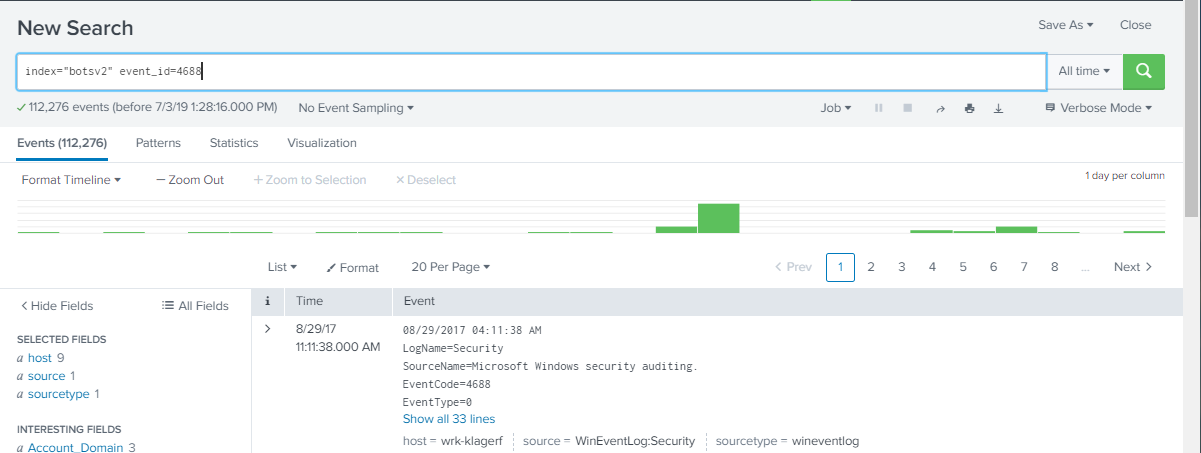

I'm not sure why this changes the results.


List of the searches with bugs: At least all signatures with 112 276 alarms have the bug
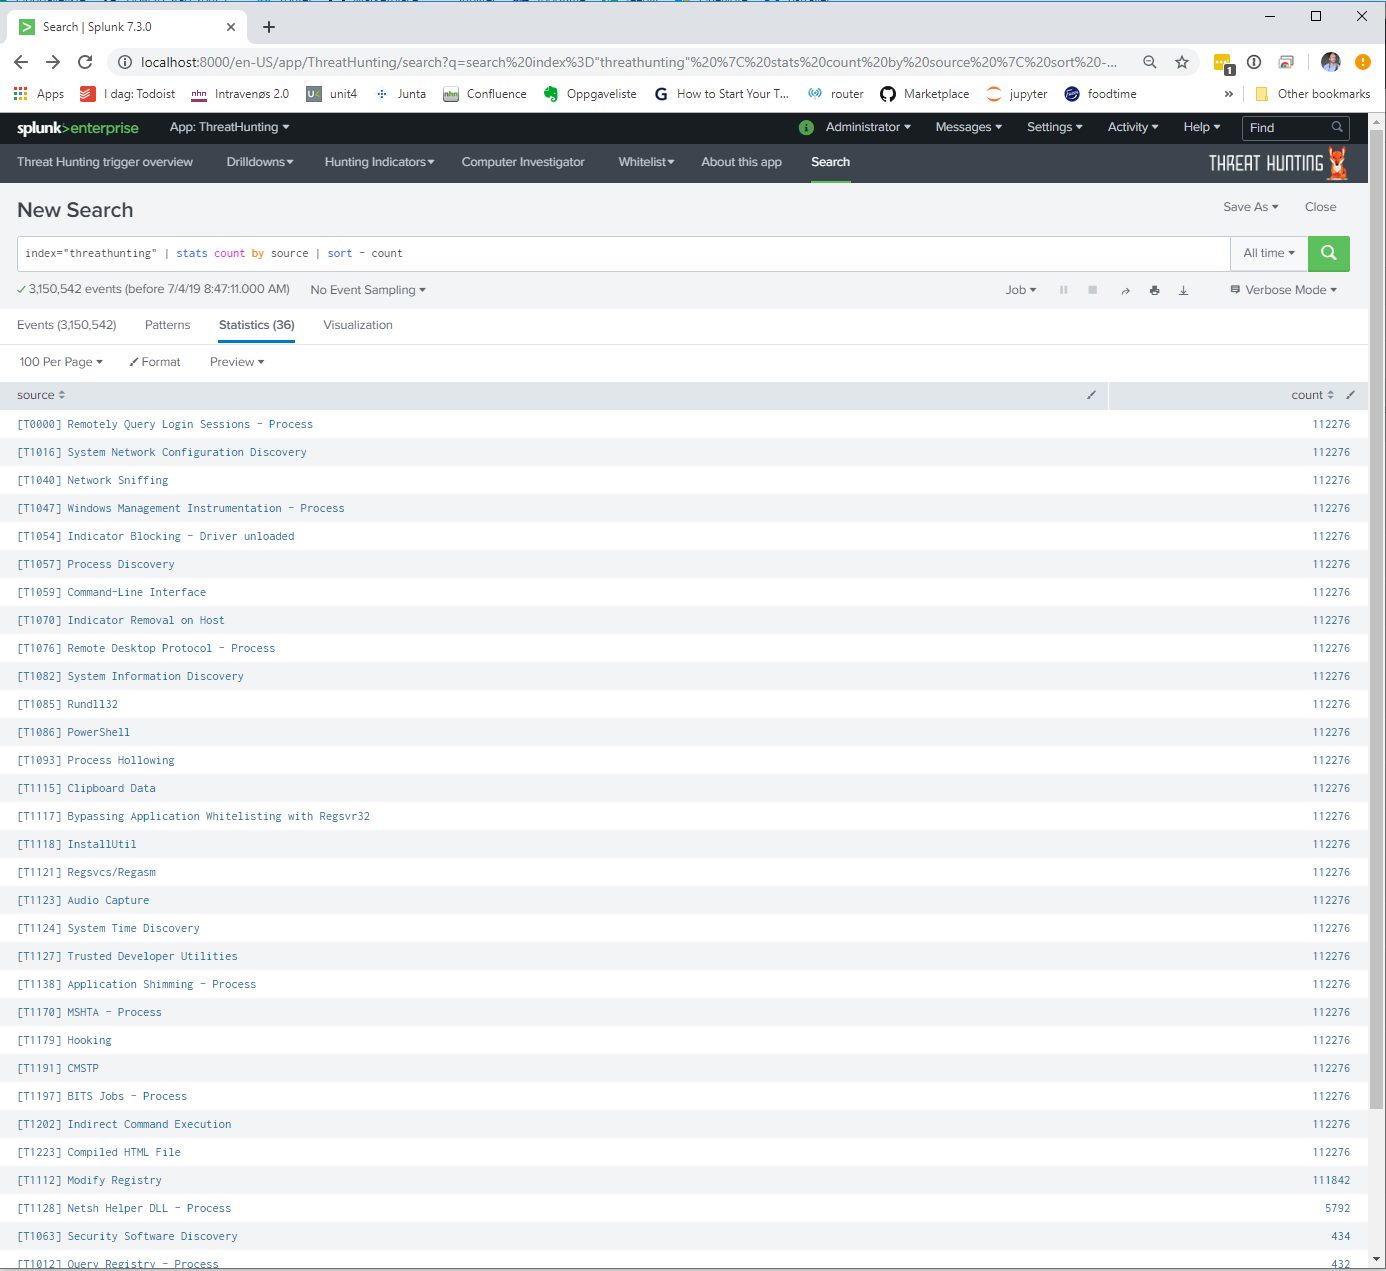

fixing all the signatures and rerunning gave me the following alarm dashboard. Thre might be more bugs in the signatures
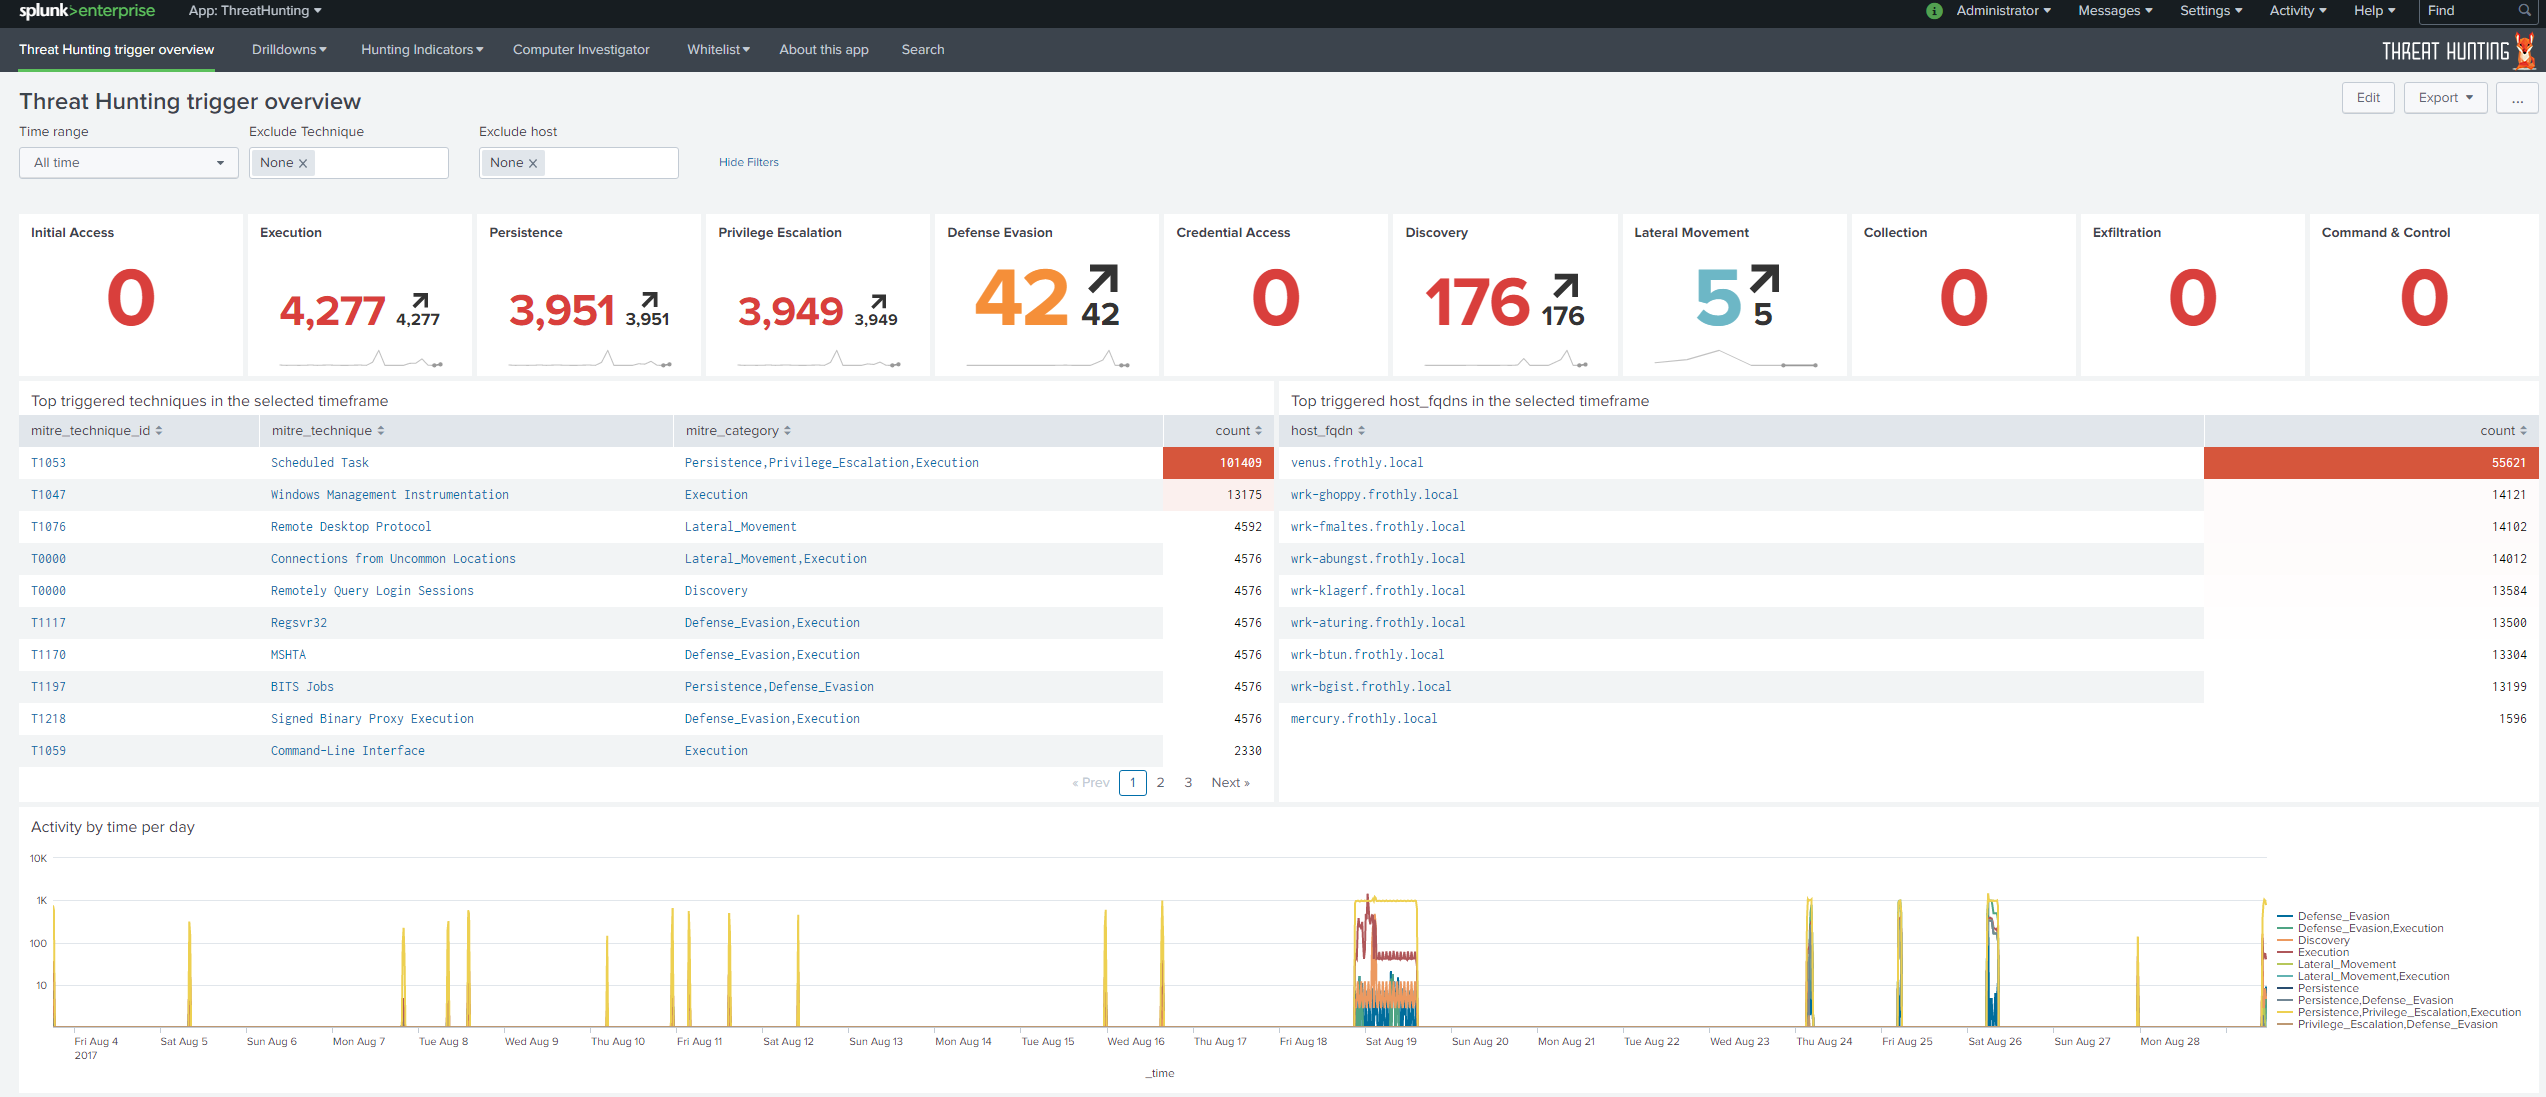